# A Deep Learning based Efficacy Prediction System for Drug Discovery

Here shows the demo for training process

In [1]:
########################################################
# All rights reserved. 
# Author: XIE Zhengwei @ Beijing Gigaceuticals Tech Co., Ltd 
#                      @ Peking University International Cancer Institute
# Contact: xiezhengwei@gmail.com
#
#
########################################################
from dleps_predictor import DLEPS

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [2]:
dleps_p = DLEPS()

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
DLEPS: No input of up files

DLEPS: No input of down files



In [3]:
dleps_p.model[0].summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 277, 76)      0                                            
__________________________________________________________________________________________________
conv_1 (Conv1D)                 (None, 269, 9)       6165        input_4[0][0]                    
__________________________________________________________________________________________________
conv_2 (Conv1D)                 (None, 261, 9)       738         conv_1[0][0]                     
__________________________________________________________________________________________________
conv_3 (Conv1D)                 (None, 251, 10)      1000        conv_2[0][0]                     
____________________________________________________________________________________________

In [4]:
import h5py
h5f = h5py.File('../../data/SMILE_train_demo.h5', 'r')

smile_train = h5f['data'][:]
h5f2 = h5py.File('../../data/SMILE_test_demo.h5', 'r')

smile_test = h5f2['data'][:]

smile_train.shape

(1000, 277, 76)

In [5]:
h5f3 = h5py.File('../../data/RNA_train_demo.h5', 'r')

rna_train = h5f3['data'][:]
h5f4 = h5py.File('../../data/RNA_test_demo.h5', 'r')

rna_test = h5f4['data'][:]

rna_train.shape

(1000, 978)

In [6]:
print(rna_train.shape)
print(rna_test.shape)
print(smile_train.shape)
print(smile_test.shape)

(1000, 978)
(400, 978)
(1000, 277, 76)
(400, 277, 76)


In [7]:
sz = int(smile_test.shape[0]/2.)
rna_val = rna_test[sz:]
rna_test = rna_test[:sz]

smile_val = smile_test[sz:]
smile_test = smile_test[:sz]

In [8]:
his = dleps_p.train(smile_train, rna_train,(smile_val, rna_val),epochs=100,
                batch_size=64,
                shuffle=True, )


Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5856 - val_loss: 0.5786
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5844 - val_loss: 0.5780
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5836 - val_loss: 0.5774
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5829 - val_loss: 0.5770
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5823 - val_loss: 0.5766
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5818 - val_loss: 0.5762
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5814 - val_loss: 0.5757
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5807 - val_loss: 0.5752
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5801 - val_loss: 0.5746
Epoch 10/100
1000/1000 [=

1000/1000 [==============================] - 1s 1ms/step - loss: 0.3318 - val_loss: 0.4741
Epoch 78/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3317 - val_loss: 0.4749
Epoch 79/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3312 - val_loss: 0.4780
Epoch 80/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3291 - val_loss: 0.4744
Epoch 81/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3299 - val_loss: 0.4762
Epoch 82/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3297 - val_loss: 0.4781
Epoch 83/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3306 - val_loss: 0.4764
Epoch 84/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3299 - val_loss: 0.4758
Epoch 85/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3282 - val_loss: 0.4758
Epoch 86/100
1000/1000 [==============================] - 1s 1ms/step - loss:

In [9]:
dleps_p.model[0].load_weights('../../data/DLEPS_30000_tune_gvae10000.h5')

(1000, 277, 76)
(1000, 978)


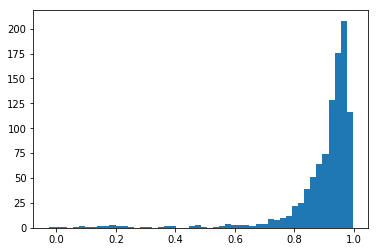

0.892505432373861


In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

y_pred = dleps_p.model[0].predict(smile_train)

corr = np.array([0.])

print(smile_train.shape)

print(y_pred.shape)
for i in range(smile_train.shape[0]):
    
    corr=np.hstack((corr,np.corrcoef(rna_train[i],y_pred[i])[0, 1]))
plt.hist(corr,50)
plt.show()
print(corr.mean())

In [11]:
from scipy.stats import gaussian_kde

def density(x,y):
    xy = np.vstack([x,y])
    return gaussian_kde(xy)(xy)

Training set

/opt/conda/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


<Figure size 1440x432 with 0 Axes>

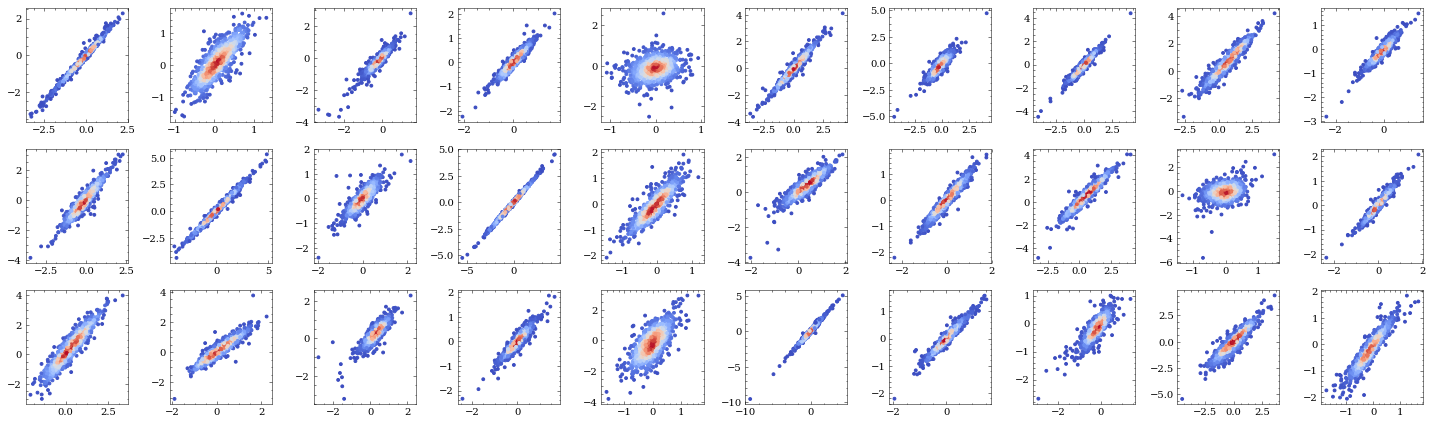

In [12]:
n = 10  # how many digits we will display
sam = 50
plt.figure(figsize=(20, 6))

with plt.style.context(['science','no-latex']):
    plt.figure(figsize=(20, 6))
    for i in range(10):
        # display original
        ax = plt.subplot(3, n, i + 1)

        plt.scatter(y_pred[sam+i],rna_train[sam+i],c=density(y_pred[sam+i],rna_train[sam+i]),s=8,cmap=plt.get_cmap("coolwarm"))
        ax = plt.subplot(3, n, i + 1*10+1)

        plt.scatter(y_pred[sam+i+10],rna_train[sam+i+10],c=density(y_pred[sam+i+10],rna_train[sam+i+10]),s=8,cmap=plt.get_cmap("coolwarm"))
        ax = plt.subplot(3, n, i + 1*20+1)

        plt.scatter(y_pred[sam+i+20],rna_train[sam+i+20],c=density(y_pred[sam+i+20],rna_train[sam+i+20]),s=8,cmap=plt.get_cmap("coolwarm"))


plt.tight_layout()
#plt.savefig('../analysis_plot/Figures/Train_Samples3_density.svg', format='svg')

Analysis of Testing set

(200, 277, 76)
(200, 978)


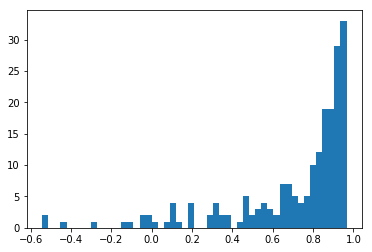

0.7080999239502417


In [13]:
y_pred2 = dleps_p.model[0].predict(smile_test)

corr = np.array([0.])

print(smile_test.shape)

print(y_pred2.shape)
for i in range(smile_test.shape[0]):
    corr=np.hstack((corr,np.corrcoef(rna_test[i],y_pred2[i])[0, 1]))
plt.hist(corr,50)
plt.show()
print(corr.mean())

Testing set

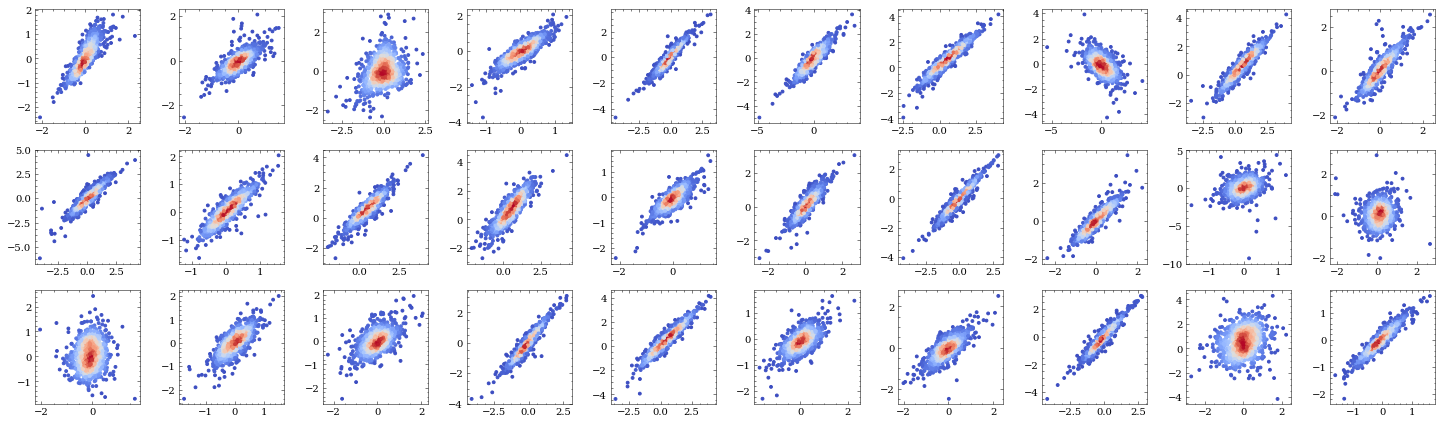

In [16]:
n = 10  # how many digits we will display
sam = 50
with plt.style.context(['science','no-latex']):
    plt.figure(figsize=(20, 6))
    for i in range(10):
        # display original
        ax = plt.subplot(3, n, i + 1)

        plt.scatter(y_pred2[sam+i],rna_test[sam+i],s=8,c=density(y_pred2[sam+i],rna_test[sam+i]),cmap="coolwarm")
        ax = plt.subplot(3, n, i + 1*10+1)

        plt.scatter(y_pred2[sam+i+10],rna_test[sam+i+10],c=density(y_pred2[sam+i+10],rna_test[sam+i+10]),s=8,cmap=plt.get_cmap("coolwarm"))
        ax = plt.subplot(3, n, i + 1*20+1)

        plt.scatter(y_pred2[sam+i+20],rna_test[sam+i+20],c=density(y_pred2[sam+i+20],rna_test[sam+i+20]),s=8,cmap=plt.get_cmap("coolwarm"))


plt.tight_layout()
#plt.savefig('../analysis_plot/Figures/Test_Samples3_density.svg', format='svg')